<h1><center> COSC 4337 Data Science II Second Milestone</center></h1>

## Data Loading & Pre-processing

In [7]:
import pandas as pd

data = pd.read_csv('SoilOrganicCarbonRecovery_NorthwestTerritories.csv')
print(data.head())

print("Null values found in columns:")
data.isnull().sum()

# 2. Drop rows with missing data
data.dropna(inplace=True)
data.isnull().sum()

     plot burn   site        date  decid_prop_canopy  piba_prop_canopy  \
0  C1-14A   C1  C1-14  2018-06-13           0.032258          0.709677   
1  C1-17A   C1  C1-17  2018-06-10           0.000000          0.000000   
2  C1-19A   C1  C1-19  2018-06-13           0.000000          0.000000   
3  C1-19B   C1  C1-19  2018-06-13           0.000000          0.650000   
4  C1-21A   C1  C1-21  2018-06-14           0.023529          0.000000   

  stand_dominance  time_after_fire moisture nonvascular_functionalgroup  \
0       Jack Pine               83    Xeric                      Lichen   
1    Black Spruce               65    Mesic                      Lichen   
2    Black Spruce               82   Hydric                    Sphagnum   
3       Jack Pine               84    Xeric                      Lichen   
4    Black Spruce               79   Hydric                  Colonizers   

   avg_org_carbon ecozone  avg_carbon_stock   latitude  longitude   
0            4.05  shield          

plot                           0
burn                           0
site                           0
date                           0
decid_prop_canopy              0
piba_prop_canopy               0
stand_dominance                0
time_after_fire                0
moisture                       0
nonvascular_functionalgroup    0
avg_org_carbon                 0
ecozone                        0
avg_carbon_stock               0
latitude                       0
longitude                      0
dtype: int64

### Linear Model - Radhika Sonde

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [19]:
column_indices = [4, 5, 7, 10, 12]
subset_data = data.iloc[:, column_indices]
correlation_matrix = subset_data.corr()
print(correlation_matrix)

                   decid_prop_canopy  piba_prop_canopy  time_after_fire  \
decid_prop_canopy           1.000000         -0.069532         0.039381   
piba_prop_canopy           -0.069532          1.000000         0.146996   
time_after_fire             0.039381          0.146996         1.000000   
avg_org_carbon             -0.263406         -0.390594         0.116197   
avg_carbon_stock           -0.282571         -0.378133         0.033524   

                   avg_org_carbon  avg_carbon_stock  
decid_prop_canopy       -0.263406         -0.282571  
piba_prop_canopy        -0.390594         -0.378133  
time_after_fire          0.116197          0.033524  
avg_org_carbon           1.000000          0.810468  
avg_carbon_stock         0.810468          1.000000  


From the correlation matrix, we can see that the strongest relationship is between avg_org_carbon and avg_carbon_stock

In [9]:
X = data['avg_org_carbon'].values.reshape(-1, 1)  # Reshape the input feature
y = data['avg_carbon_stock'].values

# Create and fit the model
model = LinearRegression().fit(X, y)

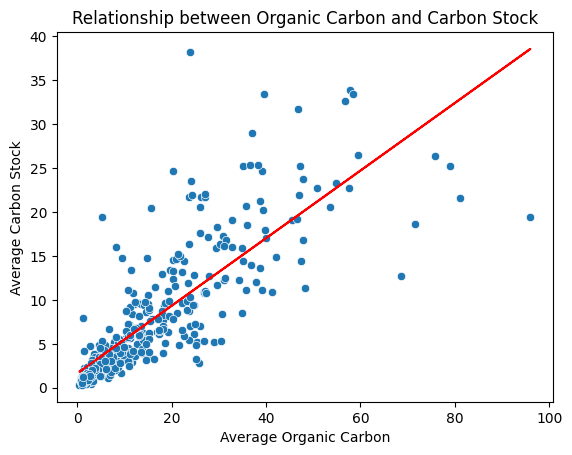

In [15]:
sns.scatterplot(x=X.flatten(), y=y)
plt.xlabel('Average Organic Carbon')
plt.ylabel('Average Carbon Stock')
plt.title('Relationship between Organic Carbon and Carbon Stock')
plt.plot(X.flatten(), model.predict(X), color='red')
plt.show()

In [20]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))
print("R:", np.sqrt(model.score(X, y)))

Coefficients: [0.38420564]
Intercept: 1.6463168562548969
R-squared: 0.656858792733177
R: 0.8104682552285296
